# 03 Weather Dataset

## Libraries & Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Render high resolution images

In [2]:
# import Kaggle dataset
weather = pd.read_csv("../assets/weather.csv")

## Data Overview

In [3]:
#Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
#Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

# display sample of dataset
pd.set_option('display.max_columns', None)
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [4]:
weather.tail()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2939,2,2014-10-29,49,40,45,M,34,42,20,0,-,-,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,0622,1649,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,M,35,42,20,0,-,-,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,0623,1647,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9
2943,2,2014-10-31,49,34,42,M,29,36,23,0,-,-,RA SN BR,M,M,M,0.04,29.54,30.20,21.7,34,22.6


In [5]:
# save Date as pandas' datetime format
weather["Date"] = pd.to_datetime(weather["Date"])

### According to [this link](https://w2.weather.gov/climate/f6.php), it seems like all the missing values are denoted by "M". We replace "M" with `np.nan` to identify missing values in our data. 

In [6]:
# replace all "M" values with np.nan 
weather[weather=="M"]=np.nan

In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2933 non-null   object        
 5   Depart       1472 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   object        
 8   Heat         2933 non-null   object        
 9   Cool         2933 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        1472 non-null   object        
 14  Water1       0 non-null      object        
 15  SnowFall     1472 non-null   object        
 16  Precip

## Feature Selection

In [8]:
# show all features included in this dataset
weather.columns.unique

<bound method Index.unique of Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')>

### We drop the following variables and the reasons are appended below within brackets: 

- `Depart` (Departure of temperature from historical norm is unlikely to affect mosquitos population)
- `WetBulb` (We do not need this as `DewPoint` will be the effective proxy of the humidity conditions)
- `Heat` and `Cool` (Variables more relevant for calculating energy needs for electrical, natural gas, power, and heating, and air conditioning industries, i.e. not as relevant to risk of mosquito breeding)
- `Sunrise` and `Sunset` (Timings of sunrise and sunset unlikely affect mosquito breeding)
- `Depth`, `Water1` and `SnowFall` (Either too many missing values or data with other info proxies)
- `ResultSpeed` and `ResultDir` (Wind direction unlikely to affect mosquito breeding)

In [9]:
weather.drop(["Depart", "WetBulb", "Heat", "Cool", "Sunrise", "Sunset", "Depth",
              "Water1", "SnowFall", "ResultSpeed", "ResultDir"], axis=1, inplace=True)

In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2933 non-null   object        
 5   DewPoint     2944 non-null   int64         
 6   CodeSum      2944 non-null   object        
 7   PrecipTotal  2942 non-null   object        
 8   StnPressure  2940 non-null   object        
 9   SeaLevel     2935 non-null   object        
 10  AvgSpeed     2941 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 253.1+ KB


## Data Cleaning 

### We impute missing values for `Tavg` by taking a simple average of `Tmax` and `Tmin`.

In [11]:
weather['Tavg'] = (weather['Tmax'] + weather['Tmin']) / 2

In [12]:
weather['Tavg'].isna().sum()

0

### Next, we examine the `CodeSum` data to explore extraction of weather conditions. 

Specifically, we want to create dummy variables - `Rain`, `Snow`, `Windy` and `Misty` - as follows:

- `Rain` = 1 if `CodeSum` contains \['TS', 'RA', 'DZ', 'SH'\] else = 0
- `Snow` = 1 if `CodeSum` contains \['SN', 'SG', 'GS', 'PL', 'IC', 'DR', 'BC', 'GR'\] else = 0
- `Windy` = 1 if `CodeSum` contains \['SQ', 'DS', 'SS', 'PO', 'BL'\] else = 0
- `Misty` = 1 if `CodeSum` contains \['BR', 'HZ', 'FG', 'FU'\] else = 0

In [13]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,CodeSum,PrecipTotal,StnPressure,SeaLevel,AvgSpeed
0,1,2007-05-01,83,50,66.5,51,,0.00,29.10,29.82,9.2
1,2,2007-05-01,84,52,68.0,51,,0.00,29.18,29.82,9.6
2,1,2007-05-02,59,42,50.5,42,BR,0.00,29.38,30.09,13.4
3,2,2007-05-02,60,43,51.5,42,BR HZ,0.00,29.44,30.08,13.4
4,1,2007-05-03,66,46,56.0,40,,0.00,29.39,30.12,11.9


In [14]:
# the weather codes within each string are not delimited and there are stray spaces and "+" symbols
weather["CodeSum"].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [15]:
# Ensuring that each code has proper spacing
codes = ['+FC','FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL',
         'IC', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'VA', 'DU', 'DS',
         'PO', 'SA', 'SS', 'PY', 'SQ', 'DR', 'SH', 'FZ', 'MI', 'PR',
         'BC', 'BL', 'VC']
weather['CodeSum'] = weather['CodeSum'].apply(lambda x: ' '.join([t for t in x.split(' ') if t in codes]))

In [16]:
# create dummy variables indicate rainy, snowy, windy and misty conditions 
weather["Rain"] = np.where(weather['CodeSum'].str.contains("|".join(['TS', 'RA', 'DZ', 'SH'])), 1, 0)
weather["Snow"] = np.where(weather['CodeSum'].str.contains("|".join(['SN', 'SG', 'GS', 'PL', 'IC', 'DR', 'BC', 'GR'])), 1, 0)
weather["Wind"] = np.where(weather['CodeSum'].str.contains("|".join(['SQ', 'DS', 'SS', 'PO', 'BL'])), 1, 0)
weather["Mist"] = np.where(weather['CodeSum'].str.contains("|".join(['BR', 'HZ', 'FG', 'FU'])), 1, 0)

In [17]:
weather.tail()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,CodeSum,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,Rain,Snow,Wind,Mist
2939,2,2014-10-29,49,40,44.5,34,,0.00,29.42,30.07,9.0,0,0,0,0
2940,1,2014-10-30,51,32,41.5,34,,0.00,29.34,30.09,5.5,0,0,0,0
2941,2,2014-10-30,53,37,45.0,35,RA,T,29.41,30.10,6.5,1,0,0,0
2942,1,2014-10-31,47,33,40.0,25,RA SN,0.03,29.49,30.20,22.9,1,1,0,0
2943,2,2014-10-31,49,34,41.5,29,RA SN BR,0.04,29.54,30.20,22.6,1,1,0,1


In [18]:
# now that we have the dummy variables for the key weather conditions, we can drop CodeSum
weather.drop(["CodeSum"], axis=1, inplace=True)

### Given that there are only 2 missing values for `PrecipTotal` at station 2, we manually impute using the forward fill method as the rainfall at both stations on the same day at likely to be similar.

In [19]:
# show rows with missing values
weather[weather["PrecipTotal"].isna()]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,Rain,Snow,Wind,Mist
117,2,2007-06-28,73,61,67.0,56,NaN,29.43,30.07,13.3,0,0,0,0
119,2,2007-06-29,71,56,63.5,56,NaN,29.47,30.11,8.2,0,0,0,0


In [20]:
# use forward fill for station 2's missing values 
weather['PrecipTotal'] = weather['PrecipTotal'].fillna(method='ffill')

### When the precipitation was not enough to measure, the data was recorded as "T". Therefore, we want to replace all these values with 0 so as to ensure the column only has numerical values.


In [21]:
# replace T with 0
weather.replace(["T", "  T"], 0, inplace=True)

In [22]:
# save column datatype as integer 
weather["PrecipTotal"] = weather["PrecipTotal"].astype(float)

In [23]:
weather['PrecipTotal'].isna().sum()

0

### Next, we impute the missing values for `StnPressure` using their respective median values.

In [24]:
# show the rows with missing observations 
weather[(weather["StnPressure"].isna()) | (weather["SeaLevel"].isna())]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,Rain,Snow,Wind,Mist
87,2,2007-06-13,86,68,77.0,53,0.00,NaN,NaN,NaN,0,0,0,0
832,1,2009-06-18,80,61,70.5,63,0.12,29.08,NaN,7.9,1,0,0,1
848,1,2009-06-26,86,69,77.5,60,0.00,NaN,29.85,8.2,0,0,0,0
994,1,2009-09-07,77,59,68.0,59,0.00,29.39,NaN,4.0,0,0,0,1
1732,1,2011-09-08,75,57,66.0,53,0.00,29.34,NaN,13.4,1,0,0,0
1745,2,2011-09-14,60,48,54.0,45,0.00,29.47,NaN,NaN,1,0,0,1
1756,1,2011-09-20,74,49,61.5,54,0.00,29.26,NaN,7.3,0,0,0,1
2067,2,2012-08-22,84,72,78.0,51,0.00,29.39,NaN,NaN,0,0,0,0
2090,1,2012-09-03,88,71,79.5,70,0.00,29.17,NaN,4.4,0,0,0,1
2410,1,2013-08-10,81,64,72.5,57,0.00,NaN,30.08,6.5,0,0,0,0


In [25]:
# impute missing values using median value
weather["StnPressure"].fillna(weather["StnPressure"].median(), inplace=True)
weather["SeaLevel"].fillna(weather["SeaLevel"].median(), inplace=True)

In [26]:
# save column datatype as integer 
weather["StnPressure"] = weather["StnPressure"].astype(float)
weather["SeaLevel"] = weather["SeaLevel"].astype(float)

In [27]:
weather['StnPressure'].isna().sum()

0

In [28]:
weather['SeaLevel'].isna().sum()

0

### Lastly, we impute the missing `AvgSpeed` values manually using the forward fill method assuming that the wind speeds were similar to those recorded at Station 1 on the same day.

In [29]:
# show rows with missing WetBulb values
weather.loc[weather["AvgSpeed"].isna()]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,Rain,Snow,Wind,Mist
87,2,2007-06-13,86,68,77.0,53,0.0,29.28,29.97,NaN,0,0,0,0
1745,2,2011-09-14,60,48,54.0,45,0.0,29.47,29.97,NaN,1,0,0,1
2067,2,2012-08-22,84,72,78.0,51,0.0,29.39,29.97,NaN,0,0,0,0


In [30]:
# impute missing values using forward fill
weather['AvgSpeed'] = weather['AvgSpeed'].fillna(method='ffill')

In [31]:
# save column datatype as integer 
weather["AvgSpeed"] = weather["AvgSpeed"].astype(float)

In [32]:
# check that dataset is now complete 
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   float64       
 5   DewPoint     2944 non-null   int64         
 6   PrecipTotal  2944 non-null   float64       
 7   StnPressure  2944 non-null   float64       
 8   SeaLevel     2944 non-null   float64       
 9   AvgSpeed     2944 non-null   float64       
 10  Rain         2944 non-null   int32         
 11  Snow         2944 non-null   int32         
 12  Wind         2944 non-null   int32         
 13  Mist         2944 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(4), int64(4)
memory usage: 276.1 KB


### Mosquitos tends to grow when the weather is humid. Therefore, we engineer an additional weather feature as follows:

`RelativeHumidity` = ![img](../images/humidity.jpg)

Source: https://www.calcunation.com/calculator/humidity-calculator.php  
Note: (X°F − 32) × 5/9 = Y°C


In [33]:
weather['RelativeHumidity'] = 100 * (np.exp((17.67 * ((weather['DewPoint'] - 32) * (5/9))) / 
                                           (243.5 + ((weather['DewPoint'] - 32) * (5/9)))) 
                                    /
                                    np.exp((17.67 * ((weather['Tavg'] - 32) * (5/9))) /
                                           (243.5 + ((weather['Tavg'] - 32) * (5/9))))
                                    )

## Data Visualization

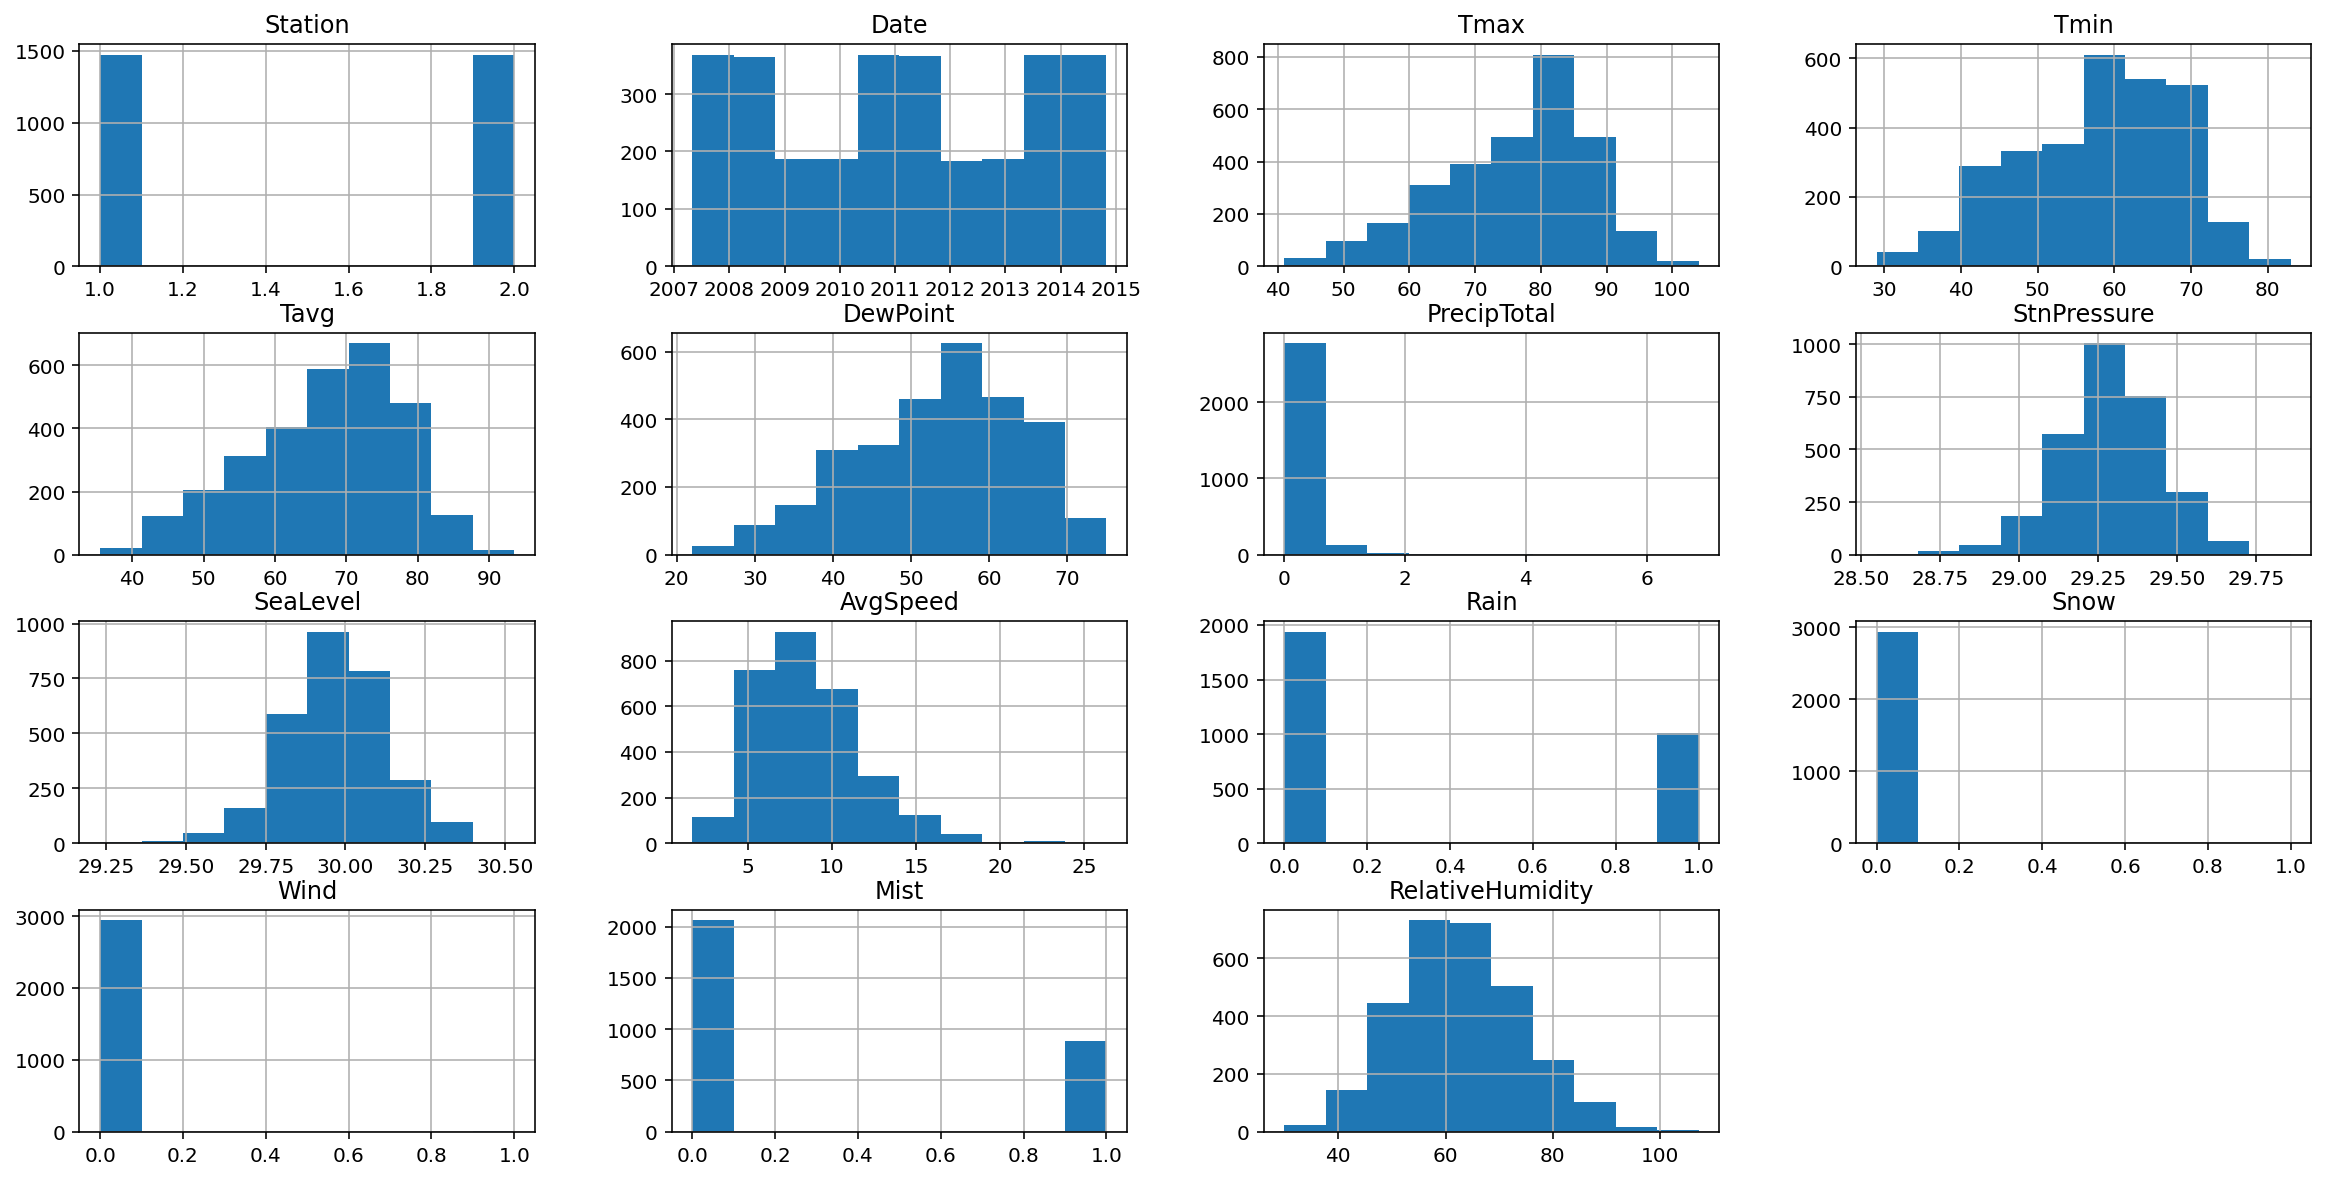

In [34]:
# plot distribution of numerical variables 
weather.hist(figsize=(20,10));

### Given that there are no variability in the `Snow` and `Wind` variables, we can drop them.

In [35]:
weather.drop(["Snow", "Wind"], axis=1, inplace=True)

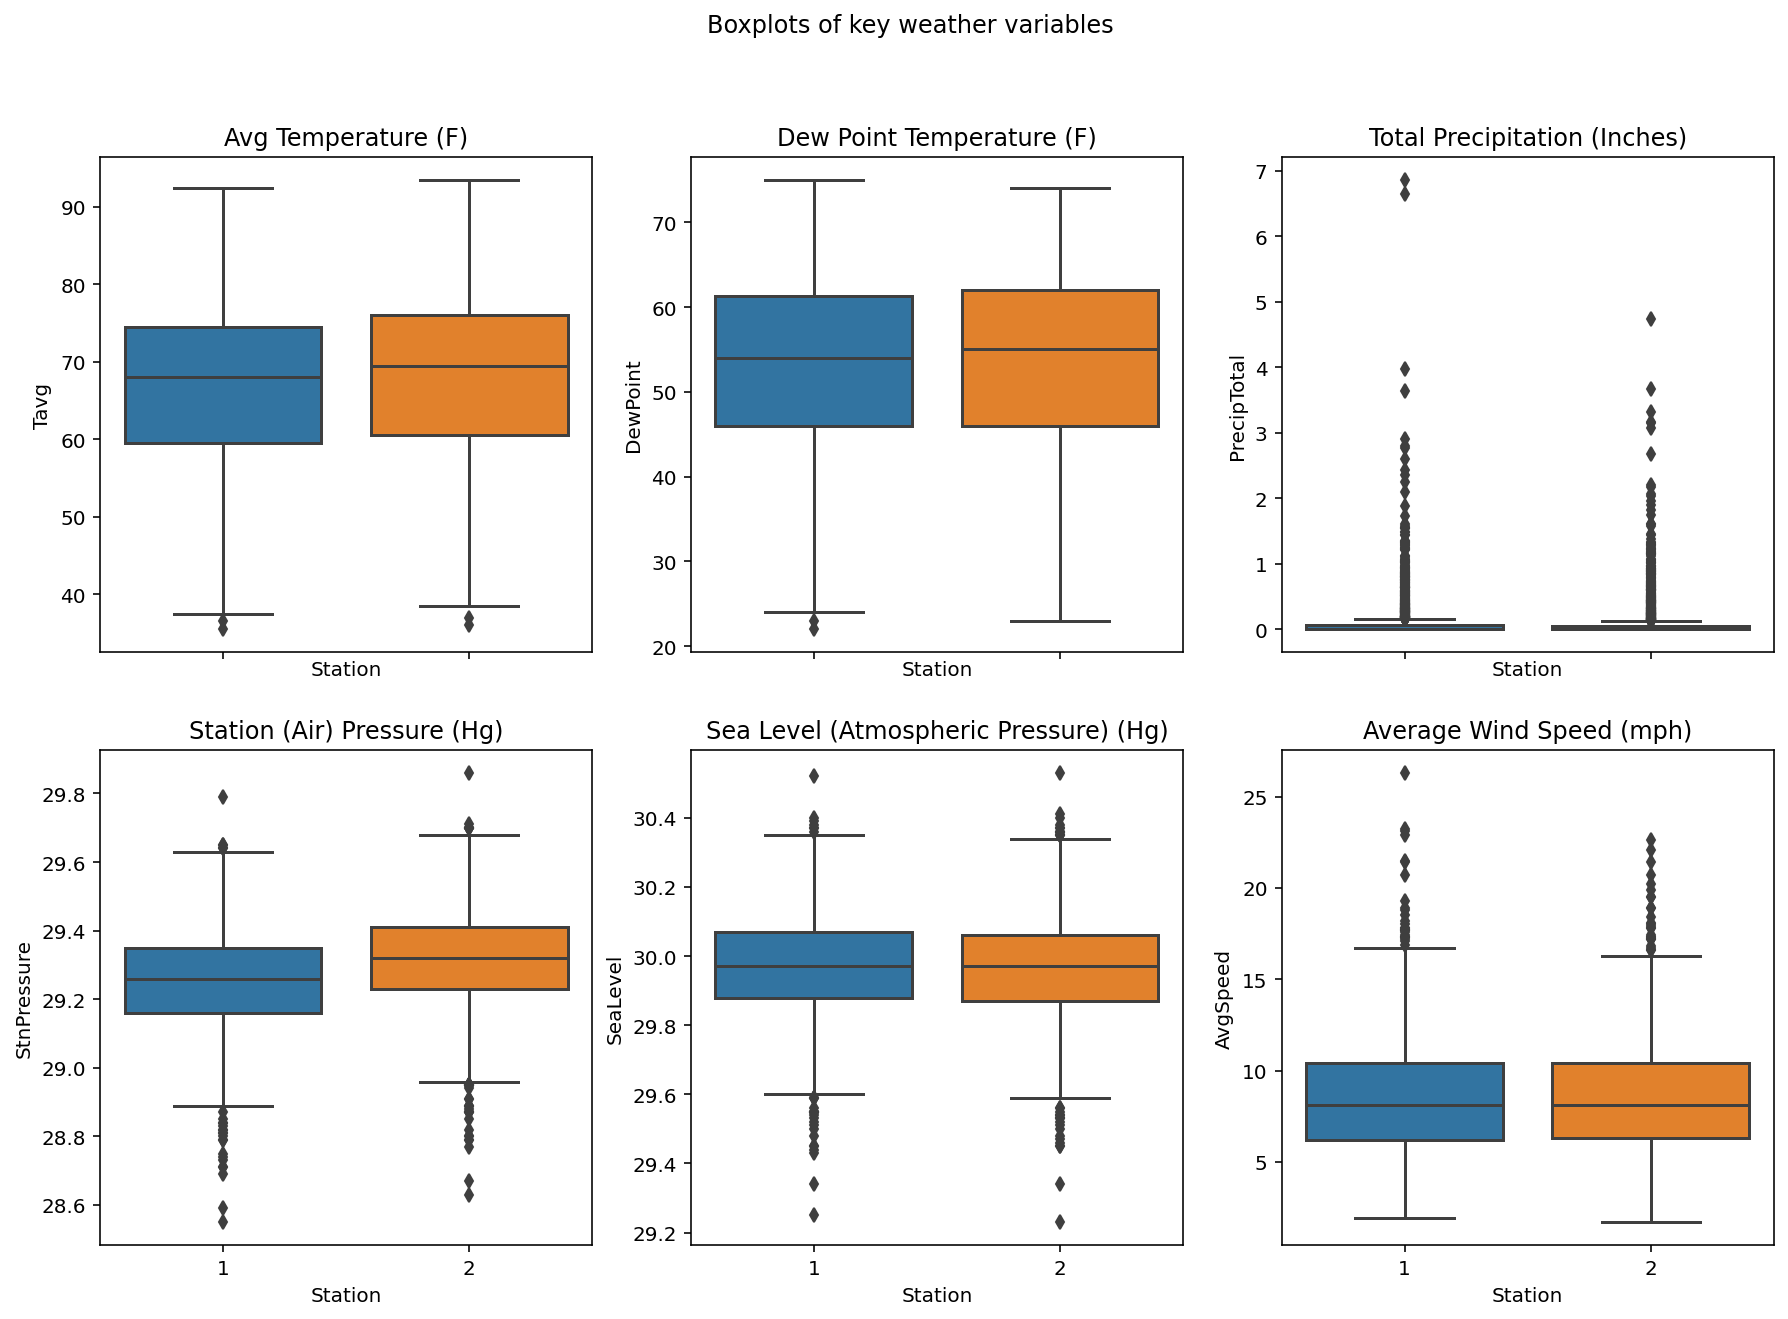

In [36]:
# draw a box plot showing the range of character and word counts for posts in both subreddits

fig, axes = plt.subplots(2, 3, sharex=True, figsize=(15,10))
fig.suptitle('Boxplots of key weather variables')

axes[0,0].set_title('Avg Temperature (F)')
sns.boxplot(y="Tavg", x="Station", data=weather, ax=axes[0,0])

axes[0,1].set_title('Dew Point Temperature (F)')
sns.boxplot(y="DewPoint", x="Station", data=weather, ax=axes[0,1])

axes[0,2].set_title('Total Precipitation (Inches)')
sns.boxplot(y="PrecipTotal", x="Station", data=weather, ax=axes[0,2])

axes[1,0].set_title('Station (Air) Pressure (Hg)')
sns.boxplot(y="StnPressure", x="Station", data=weather, ax=axes[1,0])

axes[1,1].set_title('Sea Level (Atmospheric Pressure) (Hg)')
sns.boxplot(y="SeaLevel", x="Station", data=weather, ax=axes[1,1])

axes[1,2].set_title('Average Wind Speed (mph)')
sns.boxplot(y="AvgSpeed", x="Station", data=weather, ax=axes[1,2]);

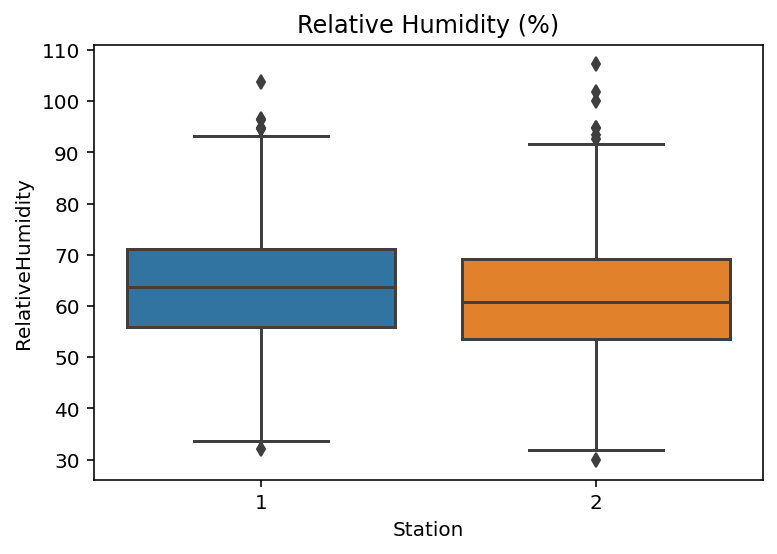

In [37]:
plt.title('Relative Humidity (%)')
sns.boxplot(y="RelativeHumidity", x="Station", data=weather);

## Saving cleaned dataset

In [38]:
weather.to_csv('../assets/weather_cleaned.csv', index=False)

In [39]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,Rain,Mist,RelativeHumidity
0,1,2007-05-01,83,50,66.5,51,0.0,29.10,29.82,9.2,0,0,57.394895
1,2,2007-05-01,84,52,68.0,51,0.0,29.18,29.82,9.6,0,0,54.497276
2,1,2007-05-02,59,42,50.5,42,0.0,29.38,30.09,13.4,0,1,72.508686
3,2,2007-05-02,60,43,51.5,42,0.0,29.44,30.08,13.4,0,1,69.872482
4,1,2007-05-03,66,46,56.0,40,0.0,29.39,30.12,11.9,0,0,54.848860


In [40]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Station           2944 non-null   int64         
 1   Date              2944 non-null   datetime64[ns]
 2   Tmax              2944 non-null   int64         
 3   Tmin              2944 non-null   int64         
 4   Tavg              2944 non-null   float64       
 5   DewPoint          2944 non-null   int64         
 6   PrecipTotal       2944 non-null   float64       
 7   StnPressure       2944 non-null   float64       
 8   SeaLevel          2944 non-null   float64       
 9   AvgSpeed          2944 non-null   float64       
 10  Rain              2944 non-null   int32         
 11  Mist              2944 non-null   int32         
 12  RelativeHumidity  2944 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(2), int64(4)
memory usage: 276.1 KB
